# Explore

In [8]:
import re
import unicodedata
from wordcloud import WordCloud
import pandas as pd
import nltk
import env

import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [9]:
train, val, test = wrangle.wrangle_readmes()

returning python and Java-script data


In [14]:
# get data
df = train[["language","lemmatized"]]
df.head()

,language,lemmatized
88,Python,langchain building application llm composabili...
4,Python,backend_test_homework
12,JavaScript,aws elastic beanstalk nodejs sample appthis re...
9,JavaScript,warningversion 50 active development code bran...
80,JavaScript,heroku flow demoa barebones nodejs app using e...


**Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**

Python        67
JavaScript    58
Name: language, dtype: int64
Python        0.536
JavaScript    0.464
Name: language, dtype: float64


<Axes: >

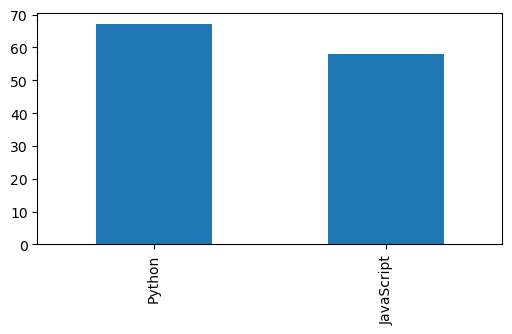

In [46]:
print(df.language.value_counts())
print(df.language.value_counts(normalize=True))
plt.figure(figsize=(6,3))
df.language.value_counts().plot(kind="bar")

**In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**

What are the most frequently occuring words?

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [24]:
py = df.lemmatized[df.language == "Python"]
js = df.lemmatized[df.language == "JavaScript"]
py_js = df.lemmatized
py.head()

88    langchain building application llm composabili...
4                                 backend_test_homework
37    pytorch image modelssponsorswhat's newintroduc...
38    stable diffusion version 2this repository cont...
56    mask rcnn object detection segmentationthis im...
Name: lemmatized, dtype: object

Text(0, 0.5, 'frequency')

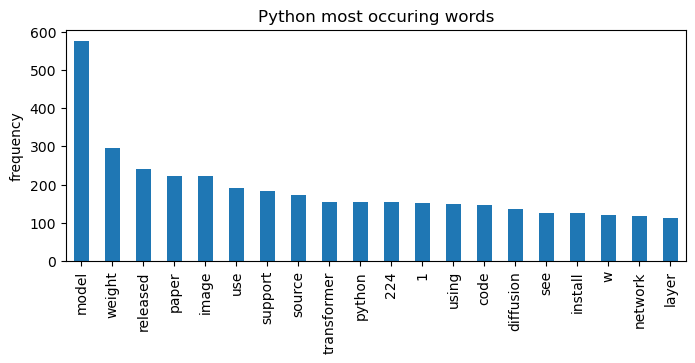

In [43]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py).split()).value_counts().head(20).plot(kind="bar")
plt.title("Python most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

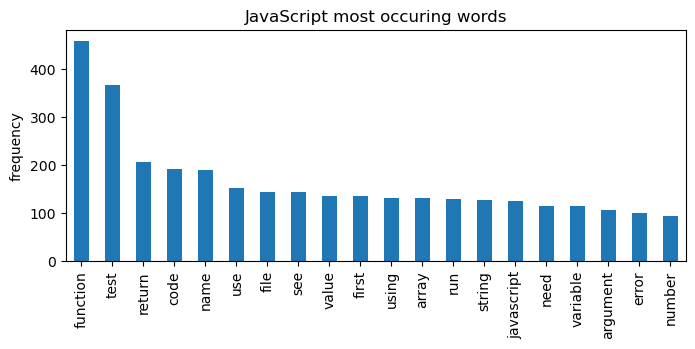

In [44]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(js).split()).value_counts().head(20).plot(kind="bar")
plt.title("JavaScript most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

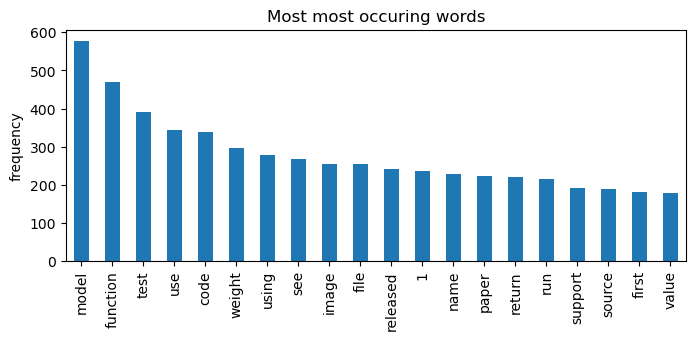

In [92]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py_js).split()).value_counts().head(20).plot(kind="bar")
plt.title("Most most occuring words")
plt.ylabel("frequency")

**Words in readme that uniqely identify python or javascript**

In [57]:
py_df = pd.Series(" ".join(py).split()).value_counts()
js_df = pd.Series(" ".join(js).split()).value_counts()
all_df = pd.Series(" ".join(py_js).split()).value_counts()

freq_df = pd.concat([py_df, js_df, all_df], axis=1).set_axis(["py", "js", "all"], axis=1)
freq_df = freq_df.fillna(0)
freq_df.head()

,py,js,all
model,577.0,1.0,578
weight,295.0,0.0,295
released,240.0,2.0,242
paper,223.0,0.0,223
image,223.0,32.0,255


Text(0, 0.5, 'frequency')

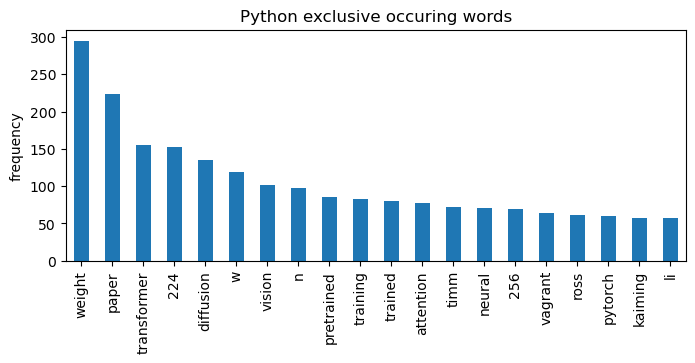

In [64]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["py"][freq_df["js"] == 0].head(20).plot(kind="bar")
plt.title("Python exclusive occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

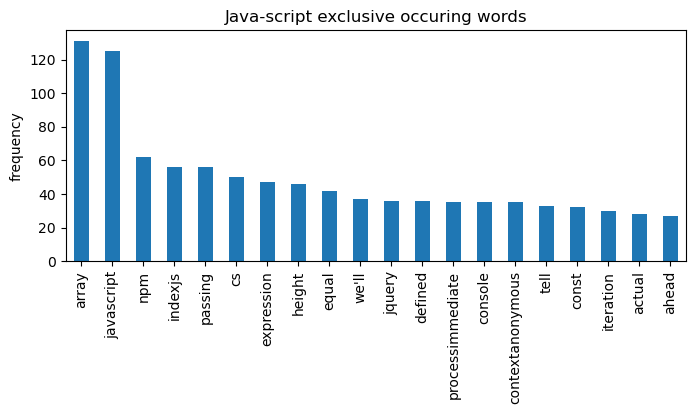

In [66]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["js"][freq_df["py"] == 0].head(20).plot(kind="bar")
plt.title("Java-script exclusive occuring words")
plt.ylabel("frequency")

**Within JavaScript and python code segments, which bigrams, or sequential pairs of words, are commonly encountered?**

In [88]:
py_doc = " ".join(py).split()
js_doc = " ".join(js).split()
all_doc = " ".join(py_js).split()

Text(0, 0.5, '# Occurances')

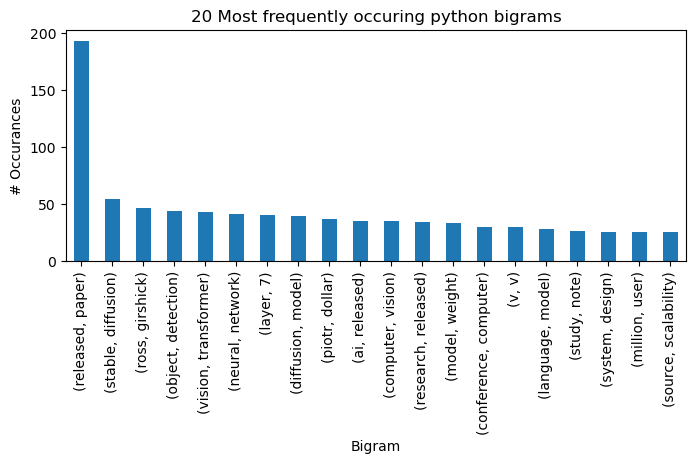

In [89]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(py_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring python bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

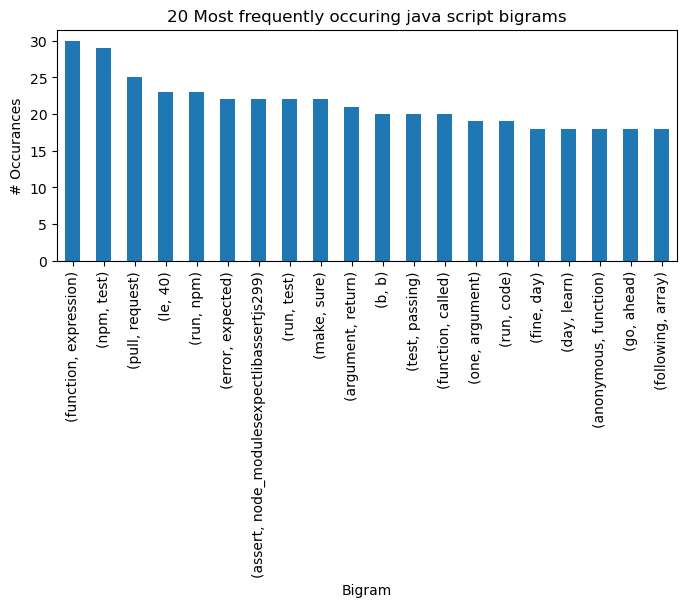

In [90]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(js_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

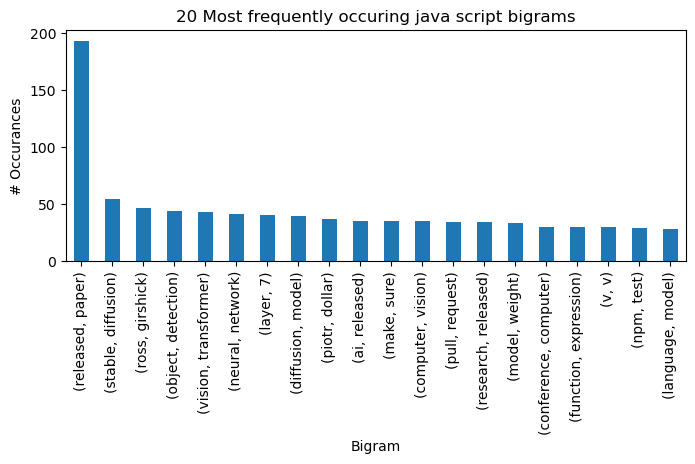

In [91]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(all_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')